# Bechdel Movie Analysis
The aim of this analysis is to understand the relationship between the Bechdel test and various factors relating to movies such as, ratings, budget, and revenue. The Bechdel test is a test that evaluates movies based on the following criteria:
1) at least two women are in it, 
2) the women talk to each other, and 
3) they are talking about something besides a man. 

In [1]:
# import all necessary libraries

import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
# import dataset with Bechdel test results - https://www.kaggle.com/datasets/alisonyao/movie-bechdel-test-scores

bechdel_raw_df = pd.read_csv('Bechdel_detailed.csv')
print(f"Rows: {bechdel_raw_df.shape[0]}\nColumns: {bechdel_raw_df.shape[1]}")
bechdel_raw_df.head()

Rows: 9373
Columns: 10


,Unnamed: 0,title,year,rating,dubious,imdbid,id,submitterid,date,visible
0,0,Passage de Venus,1874.0,0.0,0.0,3155794.0,9602.0,18880.0,2021-04-02 20:58:09,1.0
1,1,La Rosace Magique,1877.0,0.0,0.0,14495706.0,9804.0,19145.0,2021-05-11 00:11:22,1.0
2,2,Sallie Gardner at a Gallop,1878.0,0.0,0.0,2221420.0,9603.0,18882.0,2021-04-03 02:25:27,1.0
3,3,Le singe musicien,1878.0,0.0,0.0,12592084.0,9806.0,19151.0,2021-05-11 23:38:54,1.0
4,4,Athlete Swinging a Pick,1881.0,0.0,0.0,7816420.0,9816.0,19162.0,2021-05-13 01:32:14,1.0


In [3]:
# import dataset with additional move data - https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

movie_raw_df = pd.read_csv('movie_metadata.csv')
print(f"Rows: {movie_raw_df.shape[0]}\nColumns: {movie_raw_df.shape[1]}")
movie_raw_df.head()

Rows: 5043
Columns: 28


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
# clean up bechdel dataset

bechdel_raw_df['imdb_id'] = ''
bechdel_raw_df['bechdel_pass'] = ''
for i in range(len(bechdel_raw_df)):
    bechdel_raw_df['imdb_id'][i] = bechdel_raw_df.imdbid[i].astype(str).replace('.0', '') # remove .0 from imdbid

    # convert Bechdel score to pass/fail. 3 or higher is pass, 2 or lower is fail.
    if bechdel_raw_df.rating[i] > 2:
        bechdel_raw_df['bechdel_pass'][i] = True 
    else:
        bechdel_raw_df['bechdel_pass'][i] = False
    
# drop unnecessary columns
bechdel_df = bechdel_raw_df[['imdb_id', 'rating', 'dubious', 'bechdel_pass']]
# rename columns for ease of understanding
bechdel_df = bechdel_df.rename({'rating': 'bechdel_rating', 'dubious': 'bechdel_dubious'}, axis=1)

In [5]:
# Clean up the movie data

movie_raw_df['imdb_id'] = ''
for i in range(len(movie_raw_df)):
    movie_raw_df['imdb_id'][i] = movie_raw_df.movie_imdb_link[i].split('/')[4].replace('tt', '')
    movie_raw_df['movie_title'][i] = movie_raw_df['movie_title'][i].replace(u'\xa0', u'')
    movie_raw_df['title_year'][i] = str(movie_raw_df.title_year[i]).replace('.0', '')

# drop unnecessary columns
movie_df = movie_raw_df[['imdb_id', 'movie_title', 'title_year', 'genres', 'imdb_score', 'director_name', 'gross', 'content_rating', 'budget', 'actor_1_name', 'plot_keywords']]

In [6]:
# merge the two dataframes on the imdb_id column
bech_merged_df = bechdel_df.merge(movie_df, on='imdb_id', how='left')

# drop any rows that don't have a value for the columns we're interested in
bech_merged_df.dropna(subset=['movie_title', 'title_year', 'genres', 'imdb_score', 'director_name', 'gross', 'content_rating', 'budget', 'actor_1_name', 'plot_keywords'], inplace=True)
bech_merged_df = bech_merged_df.reset_index(drop=True)

bech_merged_df.head()

,imdb_id,bechdel_rating,bechdel_dubious,bechdel_pass,movie_title,title_year,genres,imdb_score,director_name,gross,content_rating,budget,actor_1_name,plot_keywords
0,1179904,3.0,1.0,True,Paranormal Activity,2007,Horror,6.3,Oren Peli,107917283.0,R,15000.0,Micah Sloat,dark force|entity|evil force|found footage|par...
1,1032846,3.0,0.0,True,"4 Months, 3 Weeks and 2 Days",2007,Drama,7.9,Cristian Mungiu,1185783.0,Not Rated,590000.0,Anamaria Marinca,female rear nudity|friend|hotel|rainy night|towel
2,1033643,3.0,NaN,True,What Happens in Vegas,2008,Comedy|Romance,6.1,Tom Vaughan,80276912.0,PG-13,35000000.0,Treat Williams,casino|father son relationship|jackpot|judge|w...
3,1013753,1.0,NaN,False,Milk,2008,Biography|Drama|History,7.6,Gus Van Sant,31838002.0,R,20000000.0,James Franco,california|gay|gay activist|gay pickup|gay rights
4,1010048,1.0,NaN,False,Slumdog Millionaire,2008,Drama|Romance,8.0,Danny Boyle,141319195.0,R,15000000.0,Anil Kapoor,cheating|falling from height|murder|non profes...


# Learning about the dataset

In [7]:
bech_merged_df.bechdel_pass.value_counts().reset_index()

,bechdel_pass,count
0,True,460
1,False,382


In [8]:
print(f"Rows: {bech_merged_df.shape[0]}\nColumns: {bech_merged_df.shape[1]}")

Rows: 842
Columns: 14


In [9]:
bech_merged_df.value_counts('bechdel_rating')

bechdel_rating
3.0    460
1.0    223
2.0    102
0.0     57
Name: count, dtype: int64

In [10]:
bech_merged_df.value_counts('director_name')

director_name
Steven Soderbergh     6
Tim Burton            5
Jaume Collet-Serra    5
Ridley Scott          5
David Ayer            5
                     ..
Jason Eisener         1
Jason Bateman         1
Jamie Travis          1
James Watkins         1
Zal Batmanglij        1
Name: count, Length: 563, dtype: int64

In [11]:
bech_merged_df.head()

,imdb_id,bechdel_rating,bechdel_dubious,bechdel_pass,movie_title,title_year,genres,imdb_score,director_name,gross,content_rating,budget,actor_1_name,plot_keywords
0,1179904,3.0,1.0,True,Paranormal Activity,2007,Horror,6.3,Oren Peli,107917283.0,R,15000.0,Micah Sloat,dark force|entity|evil force|found footage|par...
1,1032846,3.0,0.0,True,"4 Months, 3 Weeks and 2 Days",2007,Drama,7.9,Cristian Mungiu,1185783.0,Not Rated,590000.0,Anamaria Marinca,female rear nudity|friend|hotel|rainy night|towel
2,1033643,3.0,NaN,True,What Happens in Vegas,2008,Comedy|Romance,6.1,Tom Vaughan,80276912.0,PG-13,35000000.0,Treat Williams,casino|father son relationship|jackpot|judge|w...
3,1013753,1.0,NaN,False,Milk,2008,Biography|Drama|History,7.6,Gus Van Sant,31838002.0,R,20000000.0,James Franco,california|gay|gay activist|gay pickup|gay rights
4,1010048,1.0,NaN,False,Slumdog Millionaire,2008,Drama|Romance,8.0,Danny Boyle,141319195.0,R,15000000.0,Anil Kapoor,cheating|falling from height|murder|non profes...


## Commonly used dfs

In [12]:
passing_movies = bech_merged_df[bech_merged_df.bechdel_pass == True]
failing_movies = bech_merged_df[bech_merged_df.bechdel_pass == False]

all_movies = bech_merged_df.copy()

#### Changes in Bechdel Over Time

In [13]:
# Creating Dataframe for plotting the pass rate over time. 
# using groupby and merge to create a new dataframe with the pass rate over time

total_movies_year_df = all_movies.groupby(['title_year'])['imdb_id'].count().rename('total_movies') # total number of movies for the year
total_passes_year_df = passing_movies.groupby(['title_year'])['imdb_id'].count().rename('total_passes') # total number of passes for the year

by_year_df = pd.merge(total_movies_year_df, total_passes_year_df, on='title_year', how='left').fillna(0).reset_index() # merge the two dataframes
by_year_df['pass_rate'] = by_year_df.total_passes / by_year_df.total_movies # calculate the pass rate

by_year_df

,title_year,total_movies,total_passes,pass_rate
0,2007,2,2,1.000000
1,2008,23,9,0.391304
2,2009,75,32,0.426667
3,2010,97,55,0.567010
4,2011,118,60,0.508475
5,2012,112,65,0.580357
6,2013,130,80,0.615385
7,2014,122,64,0.524590
8,2015,110,60,0.545455
9,2016,53,33,0.622642


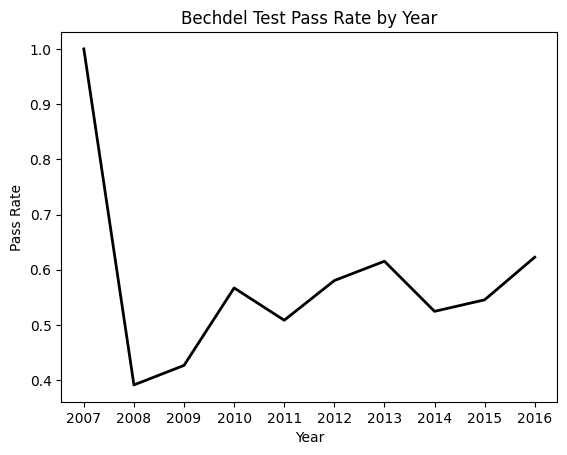

In [14]:
# plot the pass rate by year

plt.plot(by_year_df['title_year'], by_year_df['pass_rate'], color = 'k', linewidth = 2)
plt.xlabel('Year')
plt.ylabel('Pass Rate')
plt.title('Bechdel Test Pass Rate by Year')
plt.show()

pass

#### Plot Topics with the Top 5 Bechtel Scores

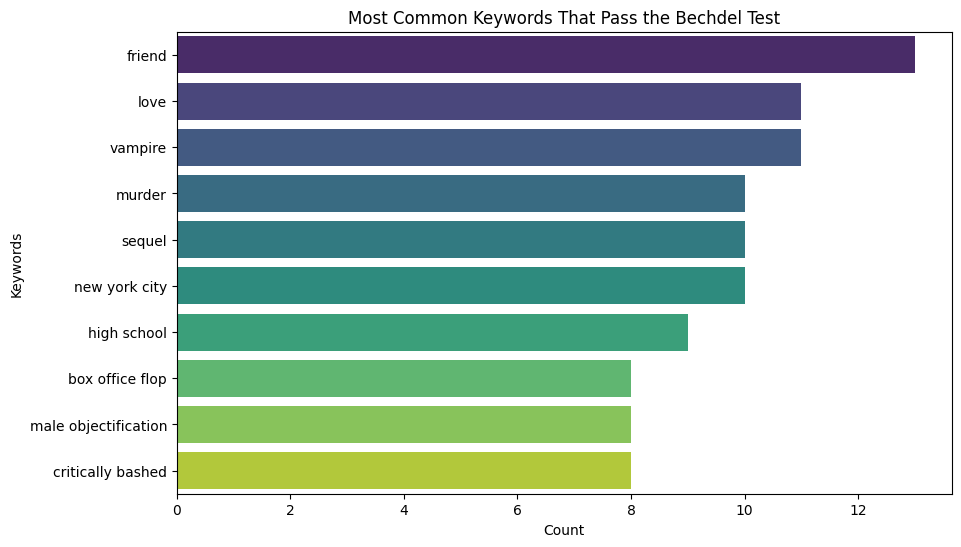

In [15]:
# Use the Passing Movies Datafame to see which keywords are most common in only the passing movies
# Plotting the COUNT of the keywords

# Split the keywords
keywords = passing_movies['plot_keywords'].str.split('|').sum()
keyword_counts = pd.Series(keywords).value_counts()

# only keep top 10
common_keywords = keyword_counts.head(10)

# get the keywords and counts
keywords = common_keywords.index.tolist()
counts = common_keywords.values.tolist()

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=keywords, palette='viridis')
plt.title('Most Common Keywords That Pass the Bechdel Test')
plt.xlabel('Count')
plt.ylabel('Keywords')
plt.show()


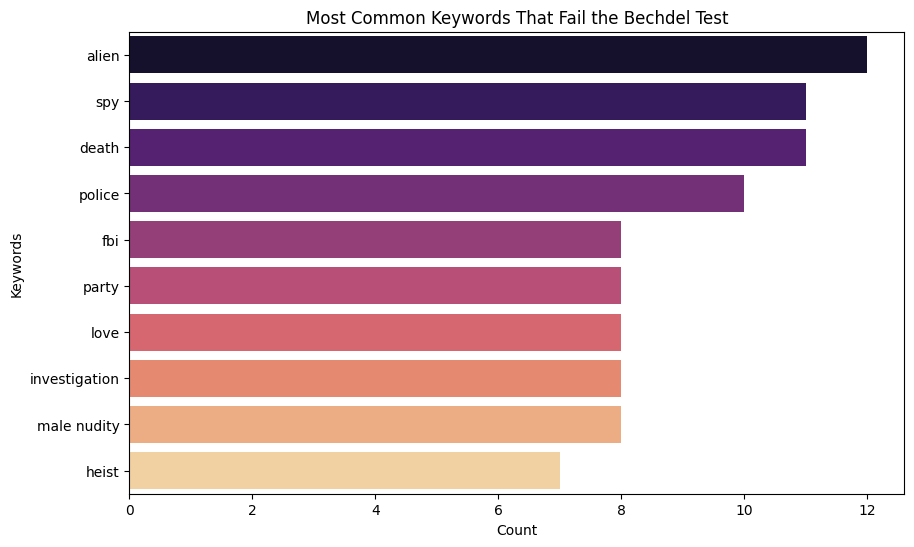

In [16]:
# Use the Failing Movies Datafame to see which keywords are most common in only the failing movies
# Plotting the COUNT of the keywords

# Split the keywords
keywords = failing_movies['plot_keywords'].str.split('|').sum()
keyword_counts = pd.Series(keywords).value_counts() 

# only keep top 10
common_keywords = keyword_counts.head(10)

# get the keywords and counts
keywords = common_keywords.index.tolist()
counts = common_keywords.values.tolist()

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=keywords, palette='magma')
plt.title('Most Common Keywords That Fail the Bechdel Test')
plt.xlabel('Count')
plt.ylabel('Keywords')
plt.show()

#### Genres with the Top 5 Bechtel Scores

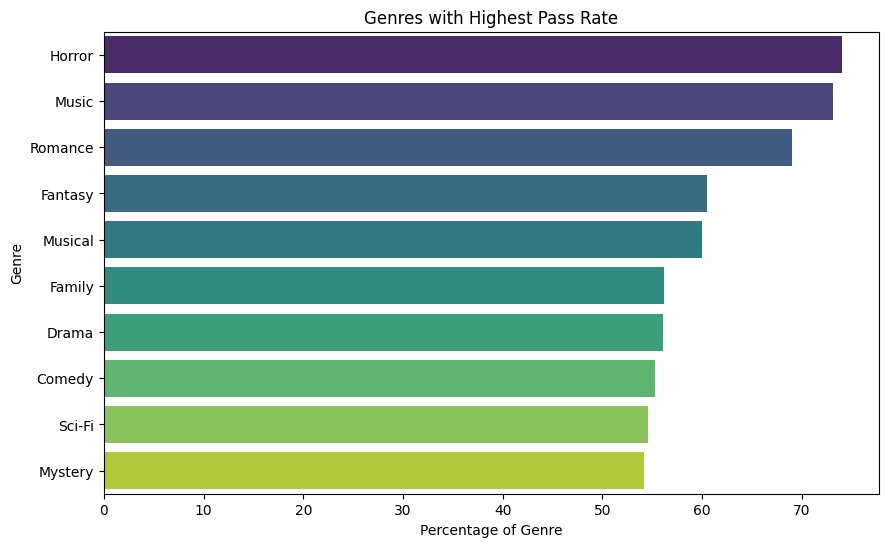

In [17]:
# Calculate the highest pass rates by percentage of genre

# Split the genres when there are multiple genres
all_genres = all_movies['genres'].str.split('|').sum()
passing_genres = passing_movies['genres'].str.split('|').sum()
genre_perc = pd.Series(passing_genres).value_counts() / pd.Series(all_genres).value_counts()

# only keep top 10
common_genres = genre_perc.sort_values(ascending=False).head(10)

genres = common_genres.index.tolist()
perc = [count*100 for count in common_genres.values.tolist()]

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x=perc, y=genres, palette='viridis')
plt.title('Genres with Highest Pass Rate')
plt.xlabel('Percentage of Genre')
plt.ylabel('Genre')
plt.show()


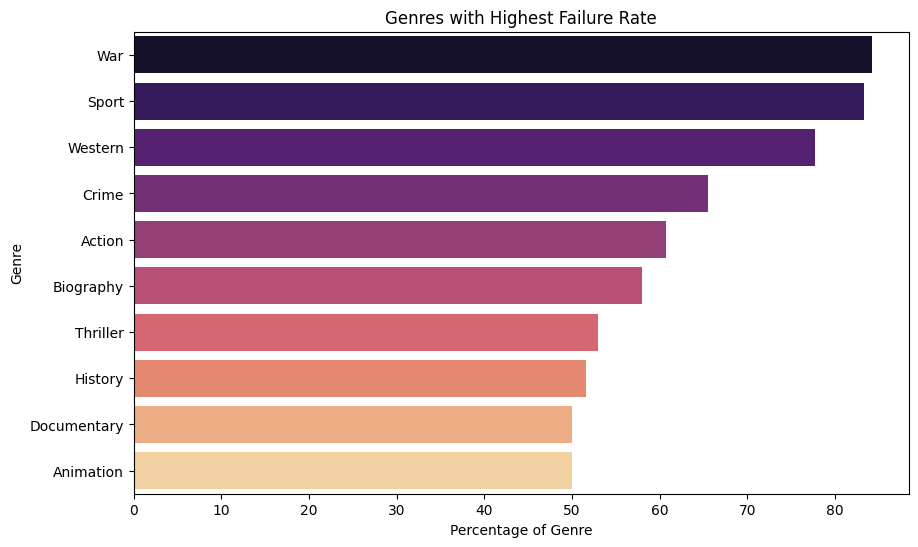

In [18]:
# Calculate the highest failure rates by percentage of genre

# Split the genres
all_genres = all_movies['genres'].str.split('|').sum()
failing_genres = failing_movies['genres'].str.split('|').sum()
genre_perc = pd.Series(failing_genres).value_counts() / pd.Series(all_genres).value_counts()

# only keep top 10
common_genres = genre_perc.sort_values(ascending=False).head(10)

genres = common_genres.index.tolist()
perc = [count*100 for count in common_genres.values.tolist()]

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x=perc, y=genres, palette='magma')
plt.title('Genres with Highest Failure Rate')
plt.xlabel('Percentage of Genre')
plt.ylabel('Genre')
plt.show()

#### Revenue & Bechdel Score

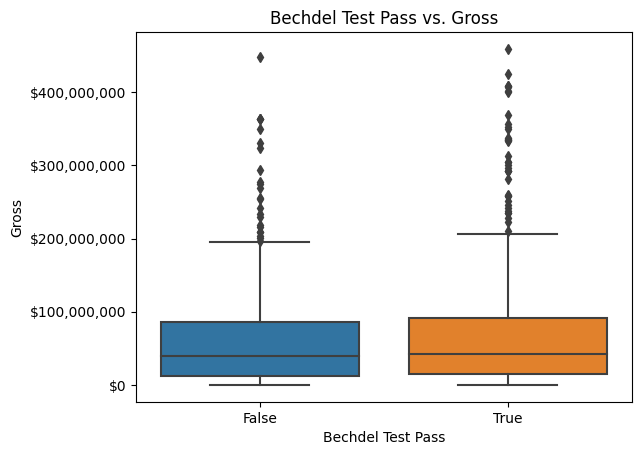

In [19]:
# Box plot of gross revenue for movies that pass and fail the Bechdel test

sns.boxplot(x='bechdel_pass', y='gross', data=all_movies)
plt.title('Bechdel Test Pass vs. Gross')
plt.xlabel('Bechdel Test Pass')
plt.ylabel('Gross')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))) # format y-axis as dollars
plt.show()

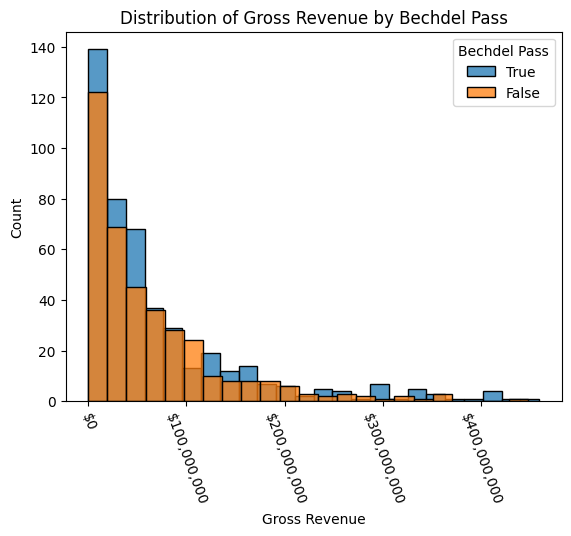

In [20]:
# Plot the count of movies by gross revenue and Bechdel pass

for category in all_movies['bechdel_pass'].unique():
    sns.histplot(all_movies[all_movies['bechdel_pass'] == category]['gross'], label=str(category))

plt.legend(title='Bechdel Pass')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
plt.xlabel('Gross Revenue')
plt.ylabel('Count')
plt.title('Distribution of Gross Revenue by Bechdel Pass')
plt.xticks(rotation=290)
plt.show()


#### Budget & Bechdel Score

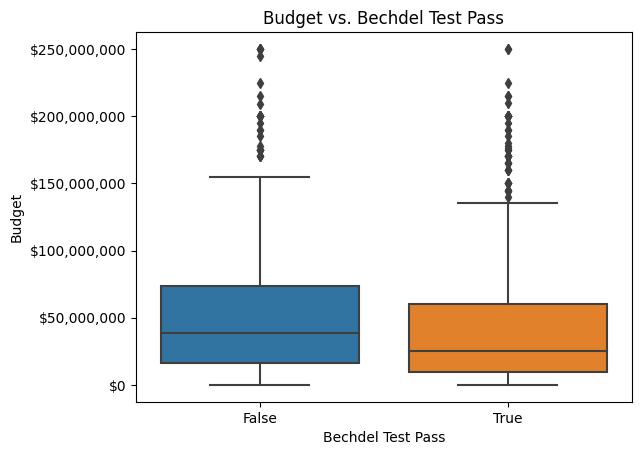

In [21]:
# boxplot of budget vs. bechdel test pass

sns.boxplot(x='bechdel_pass', y='budget', data=all_movies)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
plt.title('Budget vs. Bechdel Test Pass')
plt.xlabel('Bechdel Test Pass')
plt.ylabel('Budget')
plt.show()

#### Pass vs. Not Pass by Movie Rating

In [22]:
# Total number of movies in each content rating category
total_movies_rating_df = bech_merged_df.groupby(['content_rating'])['imdb_id'].count().rename('total_ratings')
total_movies_rating_passed_df = passing_movies.groupby(['content_rating'])['imdb_id'].count().rename('total_ratings_passed')
total_movies_rating_notpassed_df = failing_movies.groupby(['content_rating'])['imdb_id'].count().rename('total_ratings_notpassed')

In [23]:
# merge dfs and calculate pass rate
by_rating_df = pd.merge(total_movies_rating_passed_df, total_movies_rating_notpassed_df, on='content_rating', how='left').fillna(0)
by_rating_df['pass_rate'] = (by_rating_df.total_ratings_passed + by_rating_df.total_ratings_notpassed) / by_rating_df.total_ratings_passed
by_rating_df

,total_ratings_passed,total_ratings_notpassed,pass_rate
content_rating,,,
G,3,4,2.333333
Not Rated,6,7,2.166667
PG,61,45,1.737705
PG-13,204,143,1.700980
R,186,181,1.973118


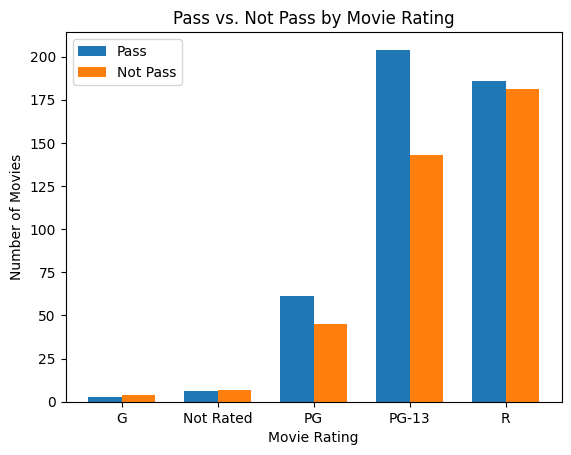

In [24]:
# Plot the number of movies that passed and did not pass the test for each rating as a bar chart

# Create positions of the left bar boundaries
bar_positions = np.arange(len(by_rating_df.index))

# create bars with bar_width
bar_width = 0.35
plt.bar(bar_positions - bar_width/2, by_rating_df.total_ratings_passed, width=bar_width, label='Pass')
plt.bar(bar_positions + bar_width/2, by_rating_df.total_ratings_notpassed, width=bar_width, label='Not Pass')

plt.title("Pass vs. Not Pass by Movie Rating")
plt.xlabel("Movie Rating")
plt.ylabel("Number of Movies")
# Replace the x-axis tick labels with the correct ones
plt.xticks(bar_positions, by_rating_df.index)
plt.legend()
plt.show()

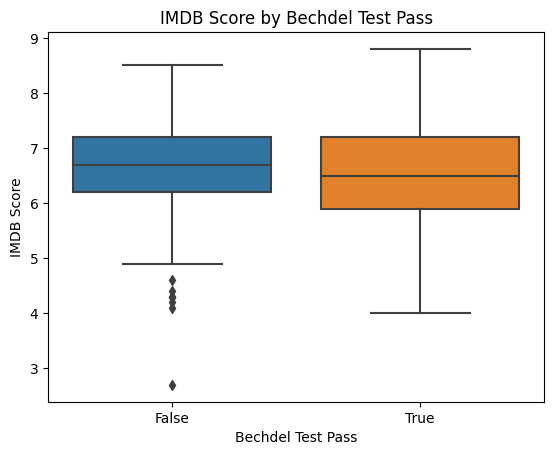

In [25]:
# Plot the IMDB score by Bechdel test pass

sns.boxplot(x='bechdel_pass', y='imdb_score', data=all_movies)
plt.title('IMDB Score by Bechdel Test Pass')
plt.xlabel('Bechdel Test Pass')
plt.ylabel('IMDB Score')
plt.show()

# Unused analysis

In [26]:
# Reason for non-use: Decided that since the majority of the directors only have 1 movie, it doesn't make sense to use this data for analysis
total_movies_dir_df = all_movies.groupby(['director_name'])['imdb_id'].count().rename('total_movies')
total_passes_dir_df = passing_movies.groupby(['director_name'])['imdb_id'].count().rename('total_passes')

by_dir_df = pd.merge(total_movies_dir_df, total_passes_dir_df, on='director_name', how='left').fillna(0).reset_index()
by_dir_df['pass_rate'] = by_dir_df.total_passes / by_dir_df.total_movies

by_dir_df = by_dir_df.sort_values(by=['total_movies', 'pass_rate'], ascending=False)

print(f"Count Number of movies per Director: \n{by_dir_df.value_counts('total_movies')}")

by_dir_df.head()

Count Number of movies per Director: 
total_movies
1    381
2    113
3     52
5      9
4      7
6      1
Name: count, dtype: int64


,director_name,total_movies,total_passes,pass_rate
497,Steven Soderbergh,6,4.0,0.666667
111,David Ayer,5,4.0,0.800000
218,James Wan,5,4.0,0.800000
516,Tim Burton,5,4.0,0.800000
555,Woody Allen,5,4.0,0.800000


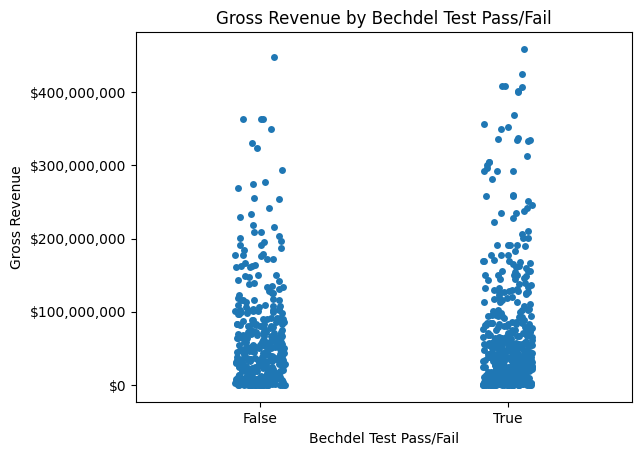

In [27]:
# Reason for non-use: Used other, more helpful, visualizations with the same data for the project

sns.stripplot(x='bechdel_pass', y='gross', data=all_movies, jitter=True)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
plt.title('Gross Revenue by Bechdel Test Pass/Fail')
plt.xlabel('Bechdel Test Pass/Fail')
plt.ylabel('Gross Revenue')
plt.show()

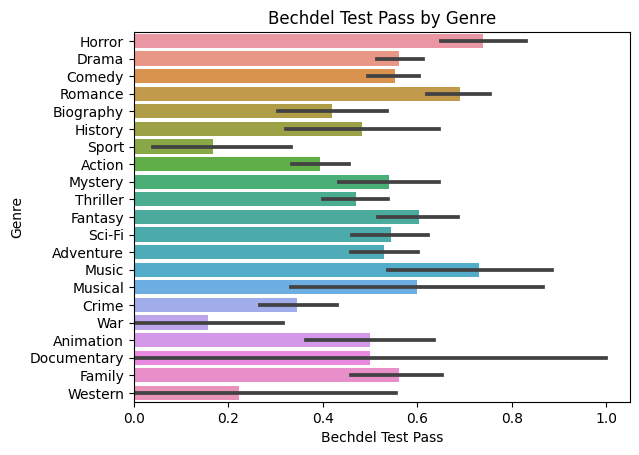

In [28]:
# Reason for non-use: Slightly misleading graph because it shows the pass/fail as a portion, when it is acutally binary

all_movies['genres'] = all_movies['genres'].str.split('|')
all_movies = all_movies.explode('genres')

sns.barplot(x='bechdel_pass', y='genres', data=all_movies)
plt.title('Bechdel Test Pass by Genre')
plt.xlabel('Bechdel Test Pass')
plt.ylabel('Genre')
plt.show()

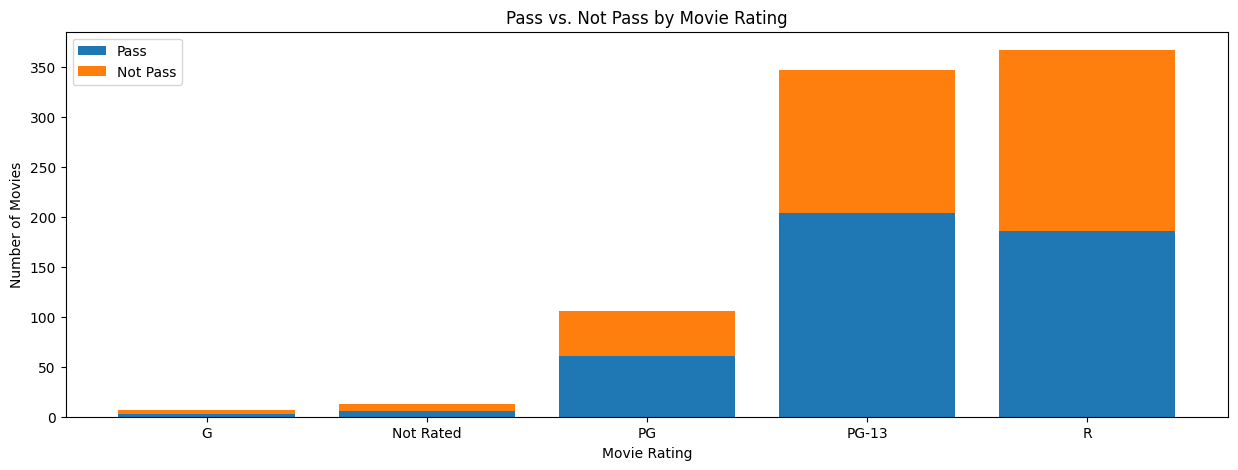

In [29]:
# reason for non-use: Used the side by side instead of stacked bar chart

total_movies_rating_df = bech_merged_df.groupby(['content_rating'])['imdb_id'].count().rename('total_ratings')
total_movies_rating_passed_df = passing_movies.groupby(['content_rating'])['imdb_id'].count().rename('total_ratings_passed')
total_movies_rating_notpassed_df = failing_movies.groupby(['content_rating'])['imdb_id'].count().rename('total_ratings_notpassed')

# plot stacked bar chart of pass vs. not pass by movie rating
plt.subplots(figsize=(15, 5))
plt.bar(by_rating_df.index, by_rating_df.total_ratings_passed)
plt.bar(by_rating_df.index, by_rating_df.total_ratings_notpassed, bottom=by_rating_df.total_ratings_passed)
plt.title("Pass vs. Not Pass by Movie Rating")
plt.xlabel("Movie Rating")
plt.ylabel("Number of Movies")
plt.legend(['Pass', 'Not Pass'])
plt.show()

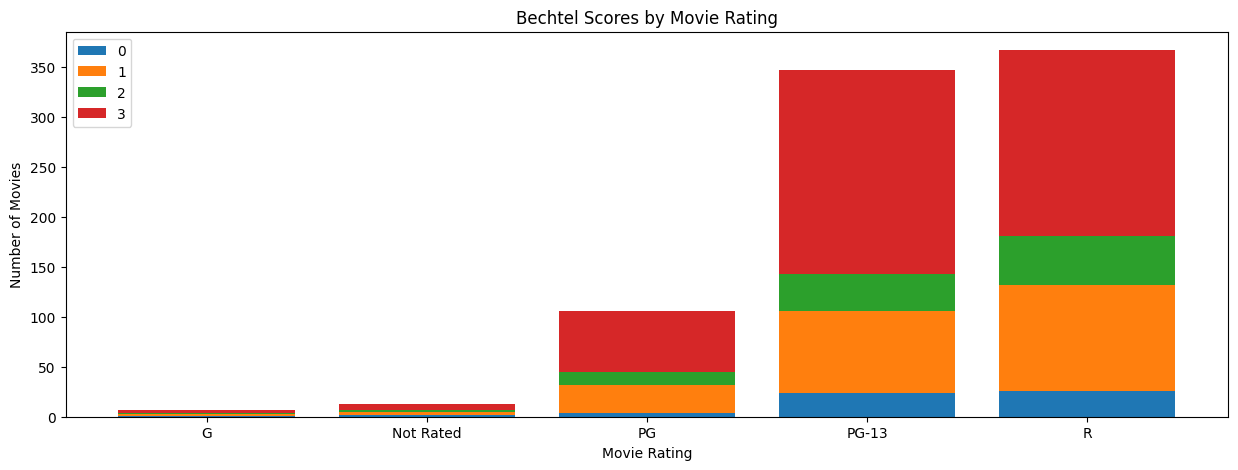

In [30]:
# Reason for non-use: We did not end up analyzing the data in this way. We kept all of the analysis to pass/fail.

total_movies_rating_0_df = bech_merged_df[bech_merged_df.bechdel_rating == 0].groupby(['content_rating'])['imdb_id'].count().rename('total_ratings_B0')
total_movies_rating_1_df = bech_merged_df[bech_merged_df.bechdel_rating == 1].groupby(['content_rating'])['imdb_id'].count().rename('total_ratings_B1')
total_movies_rating_2_df = bech_merged_df[bech_merged_df.bechdel_rating == 2].groupby(['content_rating'])['imdb_id'].count().rename('total_ratings_B2')
total_movies_rating_3_df = bech_merged_df[bech_merged_df.bechdel_rating == 3].groupby(['content_rating'])['imdb_id'].count().rename('total_ratings_B3')

by_rating_bechrating_df = pd.merge(total_movies_rating_0_df, total_movies_rating_1_df, on='content_rating', how='left').fillna(0)
by_rating_bechrating_df = pd.merge(by_rating_bechrating_df, total_movies_rating_2_df, on='content_rating', how='left').fillna(0)
by_rating_bechrating_df = pd.merge(by_rating_bechrating_df, total_movies_rating_3_df, on='content_rating', how='left').fillna(0)


plt.subplots(figsize=(15, 5))
plt.bar(by_rating_bechrating_df.index, by_rating_bechrating_df.total_ratings_B0)
plt.bar(by_rating_bechrating_df.index, by_rating_bechrating_df.total_ratings_B1, bottom=by_rating_bechrating_df.total_ratings_B0)
plt.bar(by_rating_bechrating_df.index, by_rating_bechrating_df.total_ratings_B2, bottom=by_rating_bechrating_df.total_ratings_B1+by_rating_bechrating_df.total_ratings_B0)
plt.bar(by_rating_bechrating_df.index, by_rating_bechrating_df.total_ratings_B3, bottom=by_rating_bechrating_df.total_ratings_B2+by_rating_bechrating_df.total_ratings_B1+by_rating_bechrating_df.total_ratings_B0)
plt.title("Bechtel Scores by Movie Rating")
plt.xlabel("Movie Rating")
plt.ylabel("Number of Movies")
plt.legend(['0', '1', '2', '3'])
plt.show()